In [2]:
!pip install nltk pandas scikit-learn textblob seaborn matplotlib
!pip install transformers torch


In [3]:
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from transformers import pipeline


In [4]:
# Example dataset (feel free to replace it with your own dataset)
data = pd.DataFrame({
    'text': ['I love this product!', 'Horrible service, will not buy again',
             'Good quality, but could be cheaper', 'I am so happy with this purchase!',
             'Terrible experience, not worth the money'],
    'label': [1, 0, 1, 1, 0]  # 1 = Positive, 0 = Negative
})

# Display the first few rows of the dataset
data.head()


,text,label
0,I love this product!,1
1,"Horrible service, will not buy again",0
2,"Good quality, but could be cheaper",1
3,I am so happy with this purchase!,1
4,"Terrible experience, not worth the money",0


In [5]:
# Download NLTK stop words
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Function for cleaning the text
import re
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply cleaning function to the text column
data['cleaned_text'] = data['text'].apply(clean_text)
data.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label,cleaned_text
0,I love this product!,1,love product
1,"Horrible service, will not buy again",0,horrible service buy
2,"Good quality, but could be cheaper",1,good quality could cheaper
3,I am so happy with this purchase!,1,happy purchase
4,"Terrible experience, not worth the money",0,terrible experience worth money


In [6]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_text']).toarray()

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 4
Test set size: 1


In [7]:
# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [8]:
# Using Hugging Face's pre-trained BERT for sentiment analysis
sentiment_analyzer = pipeline("sentiment-analysis")

# Analyze sentiment for a few example texts
sample_texts = [
    "I love this product!",
    "This is the worst experience I have ever had!",
    "I feel neutral about this purchase."
]

# Get sentiment predictions
predictions = sentiment_analyzer(sample_texts)
print(predictions)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9998855590820312}, {'label': 'NEGATIVE', 'score': 0.9997645020484924}, {'label': 'NEGATIVE', 'score': 0.9967330694198608}]


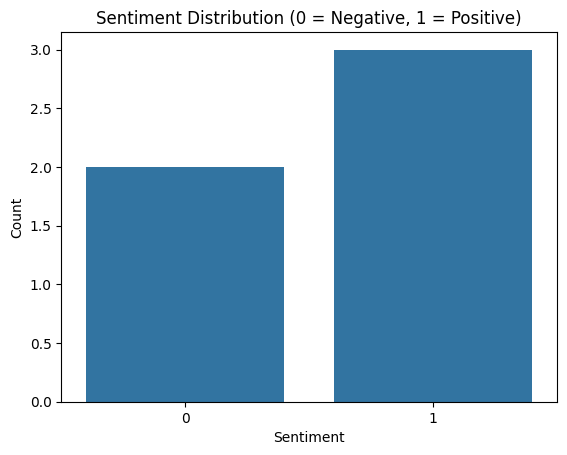

In [9]:
# Plot sentiment distribution
sns.countplot(x='label', data=data)
plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


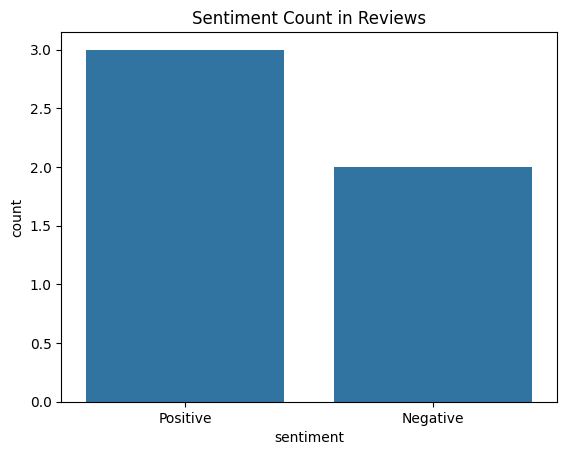

In [10]:
# Example: Sentiment distribution of each review
data['sentiment'] = data['label'].map({0: 'Negative', 1: 'Positive'})
sns.countplot(x='sentiment', data=data)
plt.title("Sentiment Count in Reviews")
plt.show()
